# Data: vehicles.csv from https://www.fueleconomy.gov/feg/ws/

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from math import sqrt
from scipy.stats import kstest
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# read data and check size
dat = pd.read_csv("vehicles.csv")
dat.shape

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(43663, 83)

In [5]:
# top of df
dat.head(5)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [6]:
# bottom of df
dat.tail(5)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
43658,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43659,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43660,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43661,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43662,18.311667,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [7]:
dat.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43663 entries, 0 to 43662
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        43663 non-null  float64
 1   barrelsA08       43663 non-null  float64
 2   charge120        43663 non-null  float64
 3   charge240        43663 non-null  float64
 4   city08           43663 non-null  int64  
 5   city08U          43663 non-null  float64
 6   cityA08          43663 non-null  int64  
 7   cityA08U         43663 non-null  float64
 8   cityCD           43663 non-null  float64
 9   cityE            43663 non-null  float64
 10  cityUF           43663 non-null  float64
 11  co2              43663 non-null  int64  
 12  co2A             43663 non-null  int64  
 13  co2TailpipeAGpm  43663 non-null  float64
 14  co2TailpipeGpm   43663 non-null  float64
 15  comb08           43663 non-null  int64  
 16  comb08U          43663 non-null  float64
 17  combA08     

In [8]:
# some basic stats
dat.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,43663.000000,43663.000000,43663.0,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,...,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000
mean,17.115707,0.222444,0.0,0.069126,18.693951,7.021316,0.793280,0.656699,0.000494,0.494322,...,23.670017,1.046068,34.809010,1.288345,2002.643520,-4260.907404,0.014465,0.237684,0.239700,0.237524
std,4.686725,1.143433,0.0,0.756315,8.876232,12.792717,6.119312,6.010857,0.038122,4.814261,...,12.622265,8.627726,12.119048,8.772993,11.706039,3586.584491,0.305459,3.566930,3.445856,3.489574
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-31500.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.400000,0.000000,28.000000,0.000000,1992.000000,-6250.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.696000,0.000000,33.400000,0.000000,2004.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
75%,19.388824,0.000000,0.0,0.000000,21.000000,15.953600,0.000000,0.000000,0.000000,0.000000,...,26.000000,0.000000,39.400000,0.000000,2013.000000,-2000.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,15.300000,150.000000,150.195800,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,187.100000,173.143600,2022.000000,6250.000000,9.600000,97.000000,81.000000,88.000000


In [9]:
dat.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31689
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

In [10]:
dat.isnull().mean()

barrels08     0.000000
barrelsA08    0.000000
charge120     0.000000
charge240     0.000000
city08        0.000000
                ...   
modifiedOn    0.000000
startStop     0.725763
phevCity      0.000000
phevHwy       0.000000
phevComb      0.000000
Length: 83, dtype: float64

In [11]:
pd.value_counts(dat.atvType)

FFV               1481
Diesel            1136
Hybrid             815
EV                 287
Plug-in Hybrid     236
CNG                 50
Bifuel (CNG)        20
Bifuel (LPG)         8
Name: atvType, dtype: int64

In [12]:
pd.unique(dat.cylinders)

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., nan, 16.])

In [13]:
pd.unique(dat.trany)

array(['Manual 5-spd', 'Automatic 3-spd', 'Automatic 4-spd',
       'Automatic 5-spd', 'Manual 4-spd', 'Manual 3-spd', 'Manual 6-spd',
       'Automatic (S5)', 'Automatic (variable gear ratios)',
       'Automatic 6-spd', 'Automatic (S6)', nan, 'Automatic (S4)',
       'Automatic 7-spd', 'Automatic (S7)', 'Automatic (S8)',
       'Automatic (AM5)', 'Automatic (AM6)', 'Automatic (AV-S7)',
       'Automatic (AV-S6)', 'Automatic (AM7)', 'Manual 4-spd Doubled',
       'Manual 7-spd', 'Automatic (L4)', 'Automatic (L3)',
       'Automatic (AV-S8)', 'Automatic 8-spd', 'Automatic (A1)',
       'Automatic (AM-S6)', 'Automatic (AM-S7)', 'Automatic 9-spd',
       'Automatic (S9)', 'Automatic (AM-S8)', 'Automatic (AM8)',
       'Automatic (AM-S9)', 'Automatic (S10)', 'Automatic (AV-S10)',
       'Automatic 10-spd', 'Automatic (A2)', 'Automatic (AV-S1)',
       'Automatic (AM-S10)'], dtype=object)

In [14]:
pd.unique(dat.fuelType1)
# fuelType2 is alternative fuel type for dual fuel vehicles

array(['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Natural Gas',
       'Electricity', 'Midgrade Gasoline'], dtype=object)

In [15]:
pd.unique(dat.year)

array([1985, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 1986,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 1984, 1987,
       1988, 1989, 1990, 1991, 1992, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [16]:
# engine size
pd.unique(dat.displ)

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 6.2, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6,
       5.4, 5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 1.7, 4.4,
       3.7, 6.7, 4.8, nan, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, 6.6, 6.4, 0.6,
       0. , 0.9])

In [17]:
pd.unique(dat.drive)

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive'],
      dtype=object)

In [18]:
pd.unique(dat.comb08)

array([ 21,  11,  27,  19,  22,  25,  24,  26,  13,  23,  20,  16,  18,
        17,  15,  10,  14,  12,  28,  34,  30,  33,  31,  41,  40,  47,
        38,  36,  32,  43,  29,   8,  35,   9,  37,  53,  85,  72,  46,
         7,  48,  65,  39,  75,  78,  52,  42,  50,  58,  56,  55,  98,
        99,  87,  44, 112,  62, 102,  73, 105,  89, 118, 107, 121,  76,
        95, 116, 115,  94, 119, 114,  63, 124,  84,  93, 100, 101,  92,
       103, 104, 136,  49,  86,  54, 108, 126, 130, 120, 113, 123,  74,
       131, 133, 111,  97, 109,  96,  79, 141,  90,  69,  68,  77, 117,
       134, 125, 110,  59, 142, 129,  70])

In [19]:
pd.unique(dat.city08)

array([ 19,   9,  23,  10,  17,  21,  22,  18,  12,  20,  14,  11,  15,
        13,  16,  25,  24,  26,  31,  27,  30,  38,  28,  43,  35,  33,
        29,  39,  37,   8,   7,  34,  32,  36,  49,  81,  45,  48,  42,
         6,  44,  74,  84,  40,  87,  41,  51,  62,  59,  79,  50,  52,
       102, 106,  94, 126,  53, 107,  77, 110,  88, 132, 122, 138,  78,
        60,  47, 129,  93, 128,  61, 137,  85, 120,  86,  89,  95, 101,
        90, 124, 121,  54,  58,  91,  97,  73,  98,  92, 150,  55,  57,
        46, 118, 112, 131, 136,  83, 125,  80, 123, 114, 140, 115, 104,
       113,  99, 127, 145, 148, 119, 105,  68,  67,  76, 116,  96, 141,
       109, 100, 108,  75,  71,  69])

In [20]:
pd.unique(dat.highway08)

array([ 25,  14,  33,  12,  23,  24,  29,  26,  31,  30,  15,  28,  22,
        20,  17,  27,  19,  11,  21,  18,  10,  13,  16,  32,  37,  35,
        36,  45,  34,  39,  44,  52,  41,  50,  38,  46,   9,  42,  43,
        40,  61,  91,  64,  49,  60,  51,  53,  58,  66,  59,  48,  69,
        47,  54,  94,  92,  79,  99,  62,  96,  68,  90, 105,  93,  74,
        97, 108, 102, 109, 101,  65, 111,  83,  82,  98, 106, 103, 107,
       100,  95,  71, 110, 122, 120,  89, 123, 112,  72, 117,  73, 124,
       104,  77, 121, 116, 132,  78, 114,  88, 127,  56,  86,  84,  80,
        81, 133, 119,  75, 115])

In [21]:
# copy to a new df, keep dat df intact
dat_spec = dat.copy()

In [22]:
# 2 groups: Auto (1) vs Manual (2) transmission. 
dat_spec['tran_A_or_M']=np.where(dat_spec.trany.str.contains('Auto'),'Auto','Manual')
dat_spec.loc[dat_spec.trany.isnull(), 'tran_A_or_M'] = np.nan
#dat_dummy1=pd.get_dummies(dat_spec['tran_A_or_M'], drop_first=True)


In [23]:
# also look at the effect of number of gears in transmission. Creat new variable 'num_gears'
dat_spec['num_gears']=dat_spec['trany'].str.replace(r'[^0-9]+', '')

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [24]:
pd.unique(dat_spec.num_gears)

array(['5', '3', '4', '6', '', nan, '7', '8', '1', '9', '10', '2'],
      dtype=object)

In [25]:
dat_spec.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive'],
      dtype=object)

In [26]:
dat_spec.drive.value_counts()

Front-Wheel Drive             14852
Rear-Wheel Drive              14447
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                3863
4-Wheel Drive                  1834
2-Wheel Drive                   507
Part-time 4-Wheel Drive         329
Name: drive, dtype: int64

In [27]:
# just care whether it's 2 or 4WD
dat_spec['WD']=np.where(dat_spec['drive'].str.contains('4-Wheel') | dat_spec['drive'].str.contains('All-Wheel'),'4WD','2WD')
dat_spec.WD
#dat_dummy2=pd.get_dummies(dat_spec.WD,drop_first=True)


0        2WD
1        2WD
2        2WD
3        2WD
4        4WD
        ... 
43658    2WD
43659    2WD
43660    4WD
43661    4WD
43662    4WD
Name: WD, Length: 43663, dtype: object

In [28]:
pd.value_counts(dat_spec.VClass)

Compact Cars                          6096
Subcompact Cars                       5393
Midsize Cars                          5210
Large Cars                            2394
Standard Pickup Trucks                2354
Two Seaters                           2218
Sport Utility Vehicle - 4WD           2078
Small Station Wagons                  1674
Sport Utility Vehicle - 2WD           1627
Special Purpose Vehicles              1455
Minicompact Cars                      1454
Standard Pickup Trucks 2WD            1335
Standard Pickup Trucks 4WD            1203
Small Sport Utility Vehicle 4WD       1191
Vans                                  1141
Standard Sport Utility Vehicle 4WD     937
Small Sport Utility Vehicle 2WD        782
Special Purpose Vehicle 2WD            708
Midsize-Large Station Wagons           656
Midsize Station Wagons                 566
Small Pickup Trucks                    538
Small Pickup Trucks 2WD                492
Vans, Cargo Type                       438
Minivan - 2

In [29]:
# 2WD vs 4WD is taken care by variable dummy 'WD' above. So remove WD info from VClass. 
# Inconsistent inputs: Vehicle vs Vehicles 
# before creating dummies
dat_spec.VClass=dat_spec.VClass.str.lower().str.replace('2wd','').str.replace('4wd','').str.replace('-','').str.replace('/','').str.replace('vehicles','vehicle')
dat_spec.VClass=dat_spec.VClass.str.replace(',','').str.replace('type','').str.strip()

In [30]:
#new VClass looks like this
dat_spec.VClass.value_counts()


compact cars                      6096
subcompact cars                   5393
midsize cars                      5210
standard pickup trucks            4896
sport utility vehicle             3705
special purpose vehicle           2496
large cars                        2394
two seaters                       2218
small sport utility vehicle       1973
small station wagons              1674
minicompact cars                  1454
small pickup trucks               1316
standard sport utility vehicle    1284
vans                              1141
midsizelarge station wagons        656
midsize station wagons             566
vans cargo                         438
minivan                            430
vans passenger                     323
Name: VClass, dtype: int64

In [31]:
#dat_dummy3=pd.get_dummies(dat_spec.VClass,drop_first=True)

In [32]:
# new df with relevant variables + 3 sets of dummies
dummies = pd.get_dummies(dat_spec[['tran_A_or_M','WD','VClass']],drop_first=True)
dat_spec1 = pd.concat([dat_spec[['comb08','city08','highway08','atvType','fuelType1','fuelType2','year','displ','num_gears','cylinders']], dummies],axis=1)

In [33]:
dat_spec1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43663 entries, 0 to 43662
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   comb08                                 43663 non-null  int64  
 1   city08                                 43663 non-null  int64  
 2   highway08                              43663 non-null  int64  
 3   atvType                                4033 non-null   object 
 4   fuelType1                              43663 non-null  object 
 5   fuelType2                              1745 non-null   object 
 6   year                                   43663 non-null  int64  
 7   displ                                  43375 non-null  float64
 8   num_gears                              43652 non-null  object 
 9   cylinders                              43373 non-null  float64
 10  tran_A_or_M_Manual                     43663 non-null  uint8  
 11  WD

In [34]:
pd.unique(dat_spec1.fuelType1)
# fuelType2 is alternative fuel type for dual cars

array(['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Natural Gas',
       'Electricity', 'Midgrade Gasoline'], dtype=object)

In [35]:
# include only gas vehicles for this analysis, exclude hybrid or dual fuel vehicles
gas_only = dat_spec1.fuelType1.isin(['Regular Gasoline','Midgrade Gasoline','Premium Gasoline'])
hybrid_excluded=dat_spec1.atvType.str.contains('Hybrid',False, True)
dual_excluded=dat_spec1.fuelType2.isnull()
dat_spec1_gasOnly = dat_spec1[gas_only & hybrid_excluded & dual_excluded]

In [36]:
dat_spec1_gasOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 6230 to 37438
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   comb08                                 815 non-null    int64  
 1   city08                                 815 non-null    int64  
 2   highway08                              815 non-null    int64  
 3   atvType                                815 non-null    object 
 4   fuelType1                              815 non-null    object 
 5   fuelType2                              0 non-null      object 
 6   year                                   815 non-null    int64  
 7   displ                                  815 non-null    float64
 8   num_gears                              815 non-null    object 
 9   cylinders                              815 non-null    float64
 10  tran_A_or_M_Manual                     815 non-null    uint8  
 11  W

In [37]:
dat_spec1_gasOnly.num_gears.unique()

array(['5', '', '4', '6', '8', '7', '9', '10'], dtype=object)

In [38]:
dat_spec1_gasOnly.replace('',np.nan)


,comb08,city08,highway08,atvType,fuelType1,fuelType2,year,displ,num_gears,cylinders,...,VClass_small station wagons,VClass_special purpose vehicle,VClass_sport utility vehicle,VClass_standard pickup trucks,VClass_standard sport utility vehicle,VClass_subcompact cars,VClass_two seaters,VClass_vans,VClass_vans cargo,VClass_vans passenger
6230,53,49,61,Hybrid,Regular Gasoline,NaN,2000,1.0,5,3.0,...,0,0,0,0,0,0,1,0,0,0
7162,47,45,49,Hybrid,Regular Gasoline,NaN,2001,1.0,NaN,3.0,...,0,0,0,0,0,0,1,0,0,0
7163,47,45,49,Hybrid,Regular Gasoline,NaN,2001,1.0,NaN,3.0,...,0,0,0,0,0,0,1,0,0,0
7164,53,48,60,Hybrid,Regular Gasoline,NaN,2001,1.0,5,3.0,...,0,0,0,0,0,0,1,0,0,0
7451,41,42,41,Hybrid,Regular Gasoline,NaN,2001,1.5,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37352,43,46,40,Hybrid,Regular Gasoline,NaN,2022,1.6,6,4.0,...,1,0,0,0,0,0,0,0,0,0
37365,32,33,30,Hybrid,Regular Gasoline,NaN,2022,1.6,6,4.0,...,0,0,0,0,0,0,0,0,0,0
37380,34,36,31,Hybrid,Regular Gasoline,NaN,2022,1.6,6,4.0,...,0,0,0,0,0,0,0,0,0,0
37437,50,49,52,Hybrid,Regular Gasoline,NaN,2022,1.6,6,4.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# atvType, fuelType1 fueType2 is no longer needed after used for filtering
dat_spec1_gasOnly.drop(['atvType','fuelType1','fuelType2'],axis=1,inplace=True)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
dat_spec1_gasOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 6230 to 37438
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   comb08                                 815 non-null    int64  
 1   city08                                 815 non-null    int64  
 2   highway08                              815 non-null    int64  
 3   year                                   815 non-null    int64  
 4   displ                                  815 non-null    float64
 5   num_gears                              815 non-null    object 
 6   cylinders                              815 non-null    float64
 7   tran_A_or_M_Manual                     815 non-null    uint8  
 8   WD_4WD                                 815 non-null    uint8  
 9   VClass_large cars                      815 non-null    uint8  
 10  VClass_midsize cars                    815 non-null    uint8  
 11  V

In [41]:
dat_spec1_gasOnly.num_gears.unique()

array(['5', '', '4', '6', '8', '7', '9', '10'], dtype=object)

In [42]:
dat_spec1_gasOnly.num_gears.replace('',np.nan,inplace=True)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [43]:
dat_spec1_gasOnly.num_gears.unique()

array(['5', nan, '4', '6', '8', '7', '9', '10'], dtype=object)

In [44]:
dat_spec1_gasOnly=dat_spec1_gasOnly.dropna()

In [45]:
dat_spec1_gasOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 6230 to 37438
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   comb08                                 537 non-null    int64  
 1   city08                                 537 non-null    int64  
 2   highway08                              537 non-null    int64  
 3   year                                   537 non-null    int64  
 4   displ                                  537 non-null    float64
 5   num_gears                              537 non-null    object 
 6   cylinders                              537 non-null    float64
 7   tran_A_or_M_Manual                     537 non-null    uint8  
 8   WD_4WD                                 537 non-null    uint8  
 9   VClass_large cars                      537 non-null    uint8  
 10  VClass_midsize cars                    537 non-null    uint8  
 11  V

In [46]:
dat_spec1_gasOnly.num_gears=pd.to_numeric(dat_spec1_gasOnly.num_gears)

In [47]:
dat_spec1_gasOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 6230 to 37438
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   comb08                                 537 non-null    int64  
 1   city08                                 537 non-null    int64  
 2   highway08                              537 non-null    int64  
 3   year                                   537 non-null    int64  
 4   displ                                  537 non-null    float64
 5   num_gears                              537 non-null    int64  
 6   cylinders                              537 non-null    float64
 7   tran_A_or_M_Manual                     537 non-null    uint8  
 8   WD_4WD                                 537 non-null    uint8  
 9   VClass_large cars                      537 non-null    uint8  
 10  VClass_midsize cars                    537 non-null    uint8  
 11  V

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020'),
 Text(21, 0, '2021'),
 Text(22, 0, '2022')]

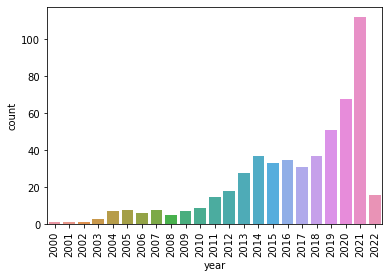

In [48]:
h=sns.countplot(dat_spec1_gasOnly.year)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '3.0'),
 Text(1, 0, '4.0'),
 Text(2, 0, '6.0'),
 Text(3, 0, '8.0'),
 Text(4, 0, '12.0')]

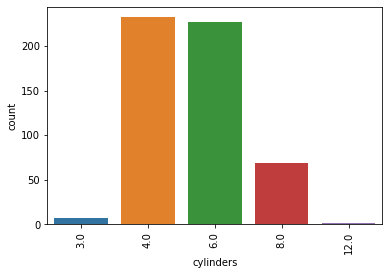

In [49]:
h=sns.countplot(dat_spec1_gasOnly.cylinders)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '1.0'),
 Text(1, 0, '1.3'),
 Text(2, 0, '1.4'),
 Text(3, 0, '1.5'),
 Text(4, 0, '1.6'),
 Text(5, 0, '2.0'),
 Text(6, 0, '2.4'),
 Text(7, 0, '2.5'),
 Text(8, 0, '2.9'),
 Text(9, 0, '3.0'),
 Text(10, 0, '3.3'),
 Text(11, 0, '3.5'),
 Text(12, 0, '3.6'),
 Text(13, 0, '4.0'),
 Text(14, 0, '4.4'),
 Text(15, 0, '5.0'),
 Text(16, 0, '5.3'),
 Text(17, 0, '5.7'),
 Text(18, 0, '6.3')]

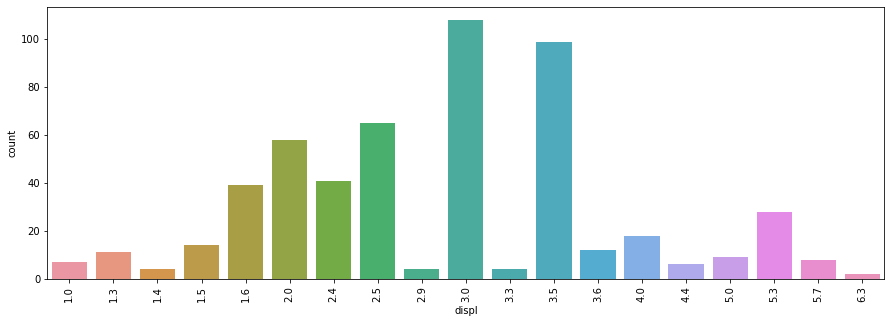

In [50]:
plt.figure(figsize=(15,5))
h=sns.countplot(dat_spec1_gasOnly.displ)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

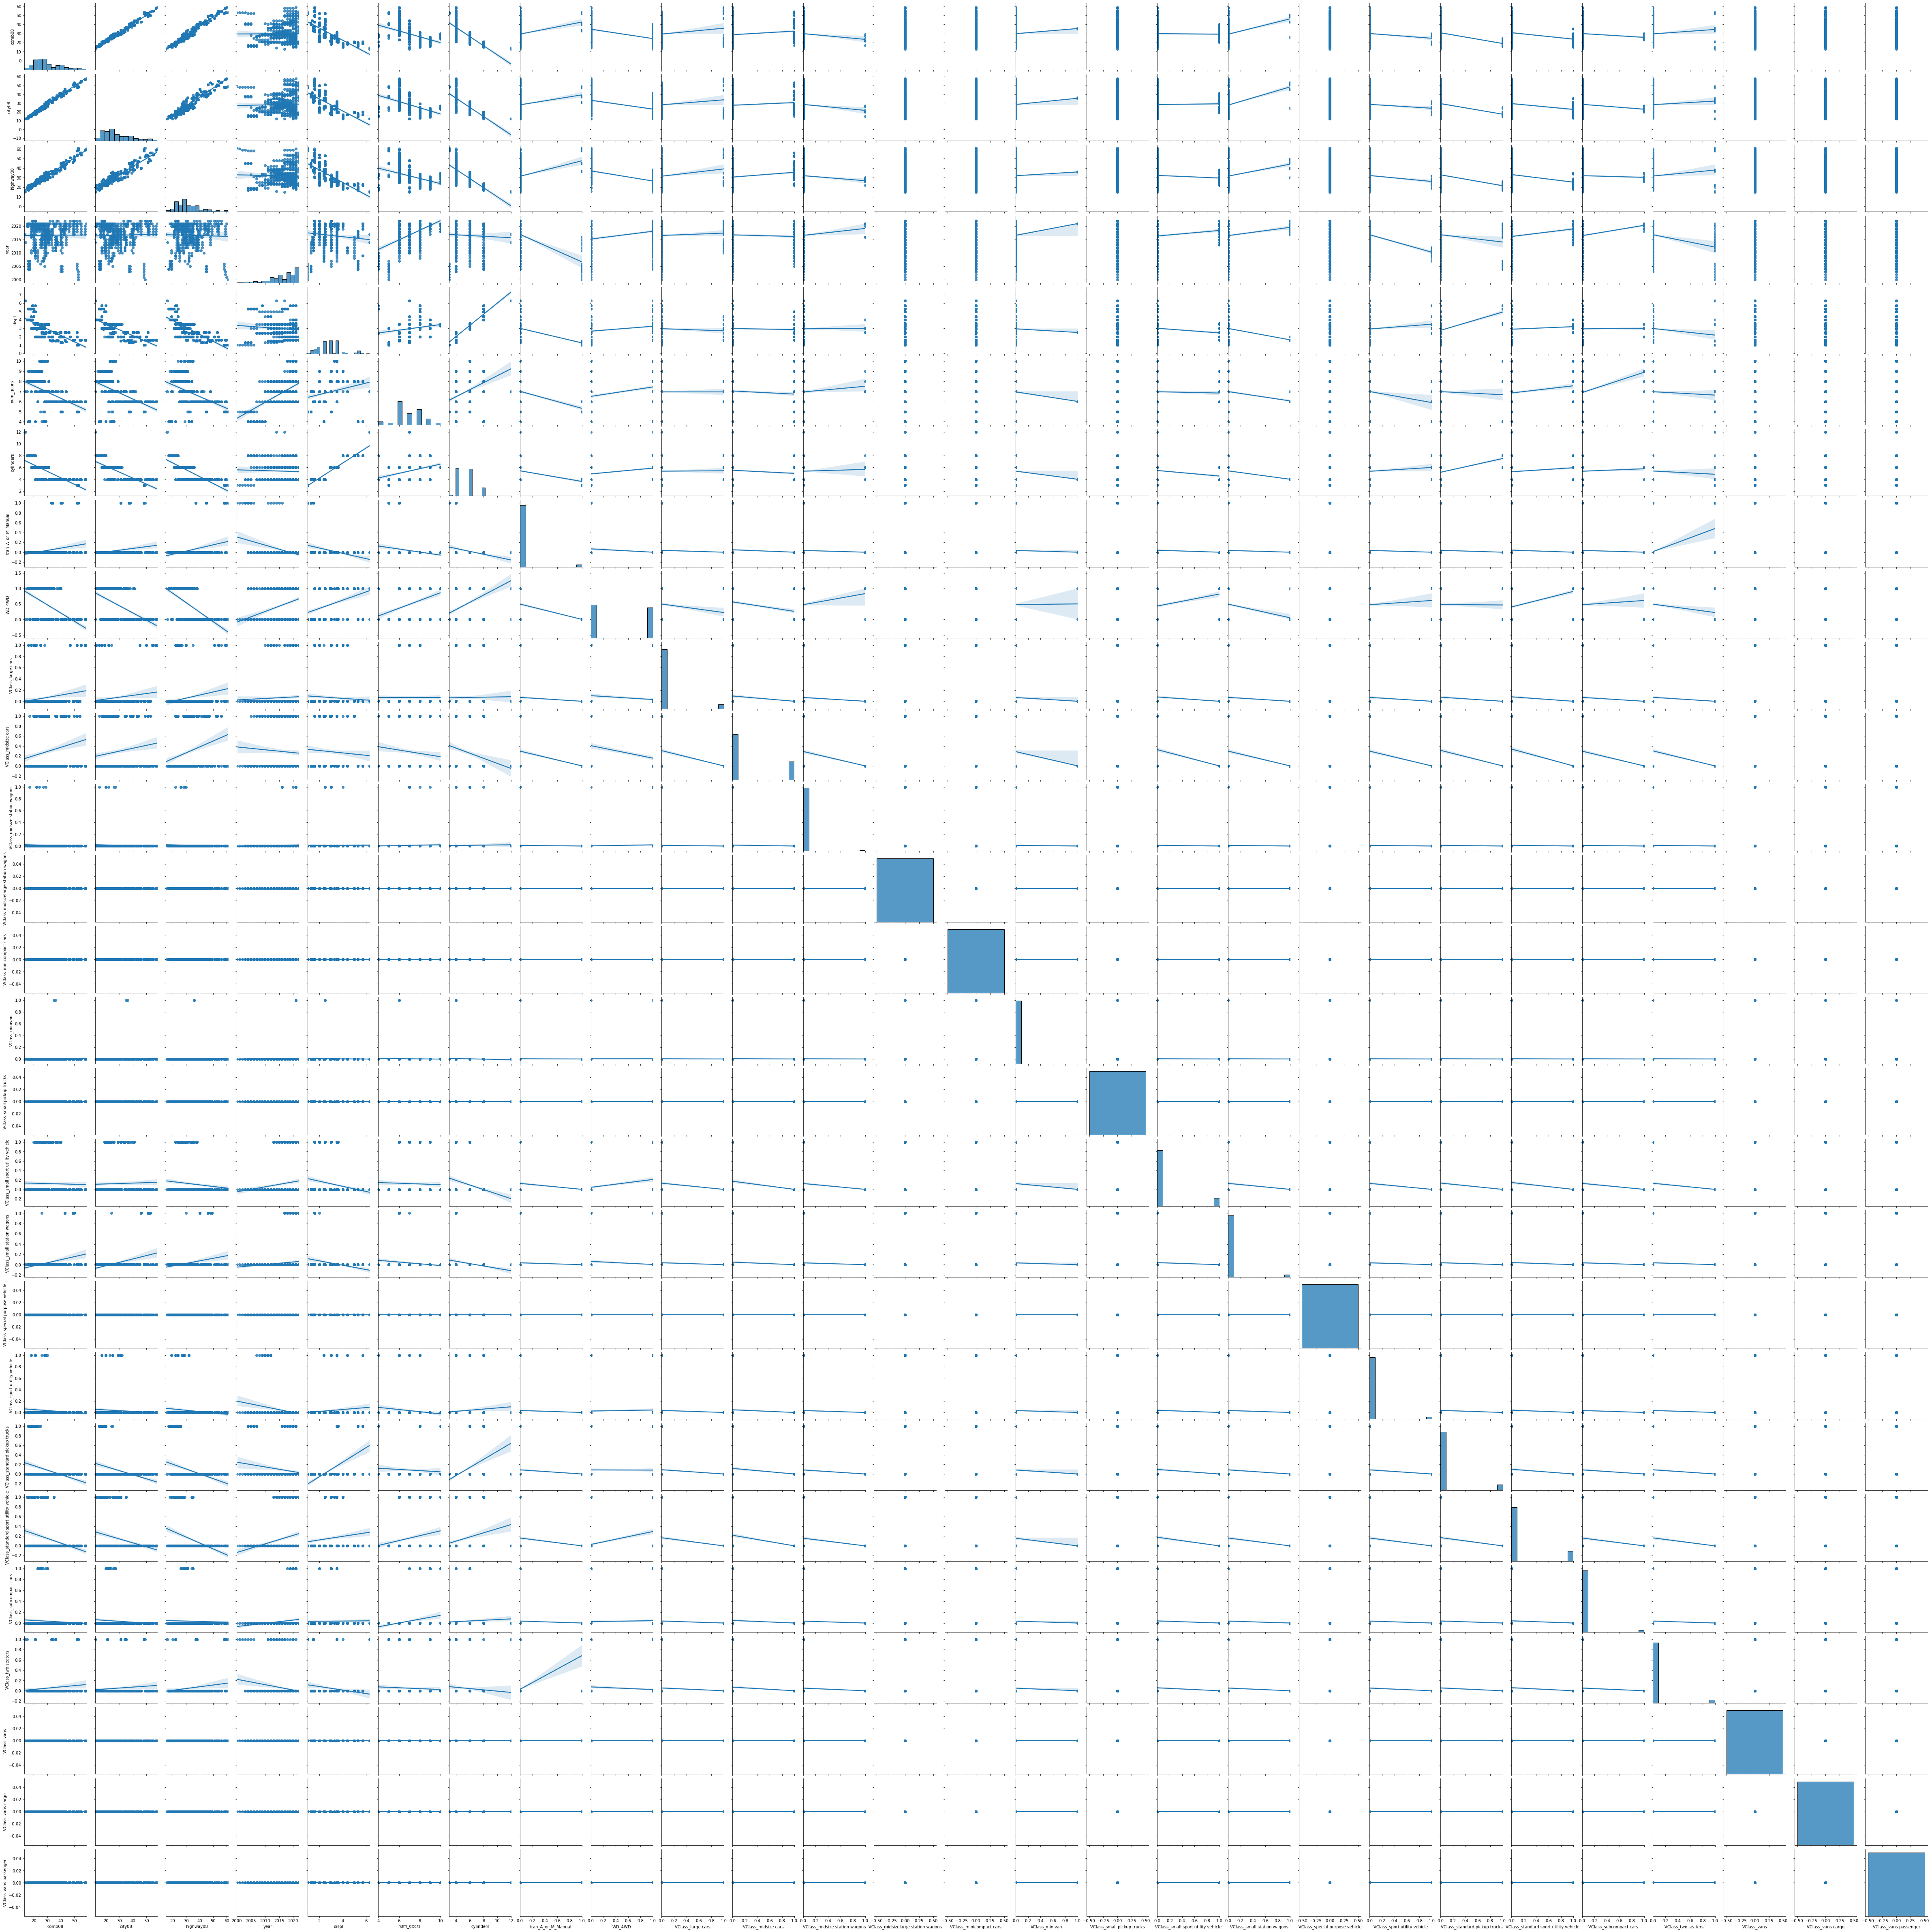

In [49]:
# check correlation across columns
sns.pairplot(dat_spec1_gasOnly, kind='reg')
plt.show()

#### comb08 is combined MPG based on city08 and highway08. That's why they are highly correlated. Just use comb08 for now.
#### in general, comb08 MPG decreases with bigger engines (displ), more # gears, more cylinders.

<AxesSubplot:>

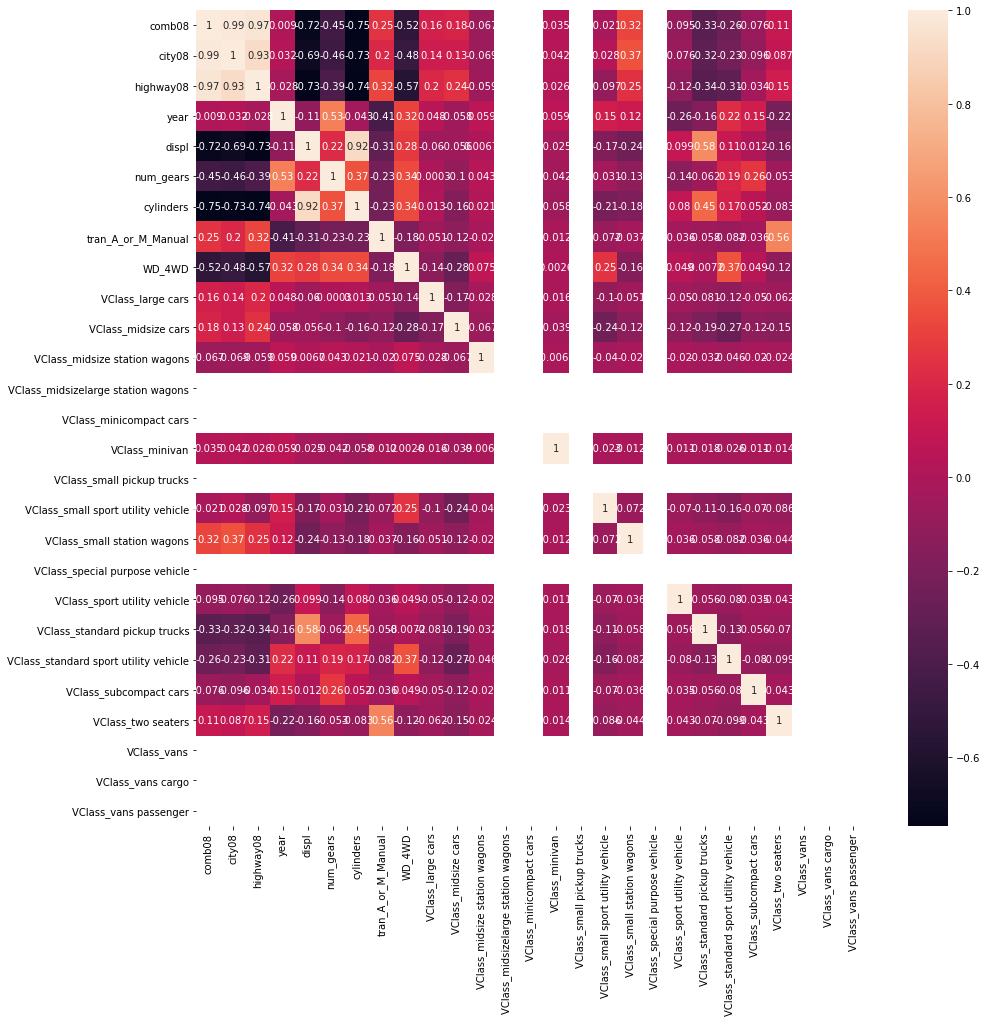

In [50]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dat_spec1_gasOnly.corr(),annot=True)

In [51]:
dat_spec1_gasOnly.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 6230 to 37438
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   comb08                                 537 non-null    int64  
 1   city08                                 537 non-null    int64  
 2   highway08                              537 non-null    int64  
 3   year                                   537 non-null    int64  
 4   displ                                  537 non-null    float64
 5   num_gears                              537 non-null    int64  
 6   cylinders                              537 non-null    float64
 7   tran_A_or_M_Manual                     537 non-null    uint8  
 8   WD_4WD                                 537 non-null    uint8  
 9   VClass_large cars                      537 non-null    uint8  
 10  VClass_midsize cars                    537 non-null    uint8  
 11  V

In [52]:
dat_spec1_gasOnly['VClass_vans'].value_counts()

0    537
Name: VClass_vans, dtype: int64

In [53]:
dat_spec1_gasOnly['VClass_vans cargo'].value_counts()

0    537
Name: VClass_vans cargo, dtype: int64

In [54]:
# Some types of vehicles no longer have data. Drop corresponding dummies
dat_spec1_gasOnly.drop(['VClass_vans cargo','VClass_vans','VClass_vans passenger','VClass_special purpose vehicle','VClass_small pickup trucks','VClass_minicompact cars','VClass_midsizelarge station wagons'],axis=1,inplace=True)

In [55]:
# Linear regression with no dummies first. Try first with no train/test splitting
m1 = LinearRegression()
X1 = dat_spec1_gasOnly[['displ','num_gears','cylinders','year']]
y1 = dat_spec1_gasOnly['comb08']
m1.fit(X1,y1)

LinearRegression()

In [56]:
print(m1.intercept_)

-520.3682976959215


In [57]:
m1.coef_

array([-3.83760643, -2.45946911, -1.64415446,  0.29124902])

In [58]:
import statsmodels.formula.api as sm

In [59]:
# Now splitting
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=0)

In [60]:
m1.fit(X1_train,y1_train)

LinearRegression()

In [67]:
# 1. Check for goodness of fit
y1_fit=m1.predict(X1_train)
print("R squared {}".format(r2_score(y_true=y1_train, y_pred=y1_fit)))
# 2. Residuals have ~zero mean
residuals = y1_train-y1_fit
print("Mean of Residuals {}".format(np.mean(residuals)))


R squared 0.6162657012611521
Mean of Residuals -9.911160211628064e-14


#### Not a really good linear relationship

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KstestResult(statistic=0.37458378353634464, pvalue=1.470217941864383e-54)

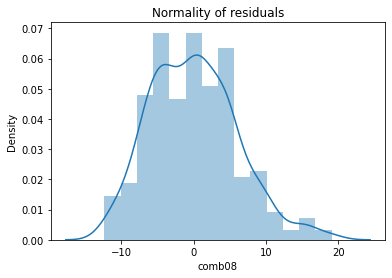

In [71]:
# 3. Normality of residuals - Kolmogorov Smirnov
sns.distplot(residuals, kde=True)
plt.title("Normality of residuals")
kstest(residuals,'norm')

#### No good normality

In [74]:
# 4. Check for autocorrelation of residuals
diag.acorr_ljungbox(residuals , lags = 10, boxpierce=True)

(array([0.15773432, 0.65796453, 3.49658315, 4.93712049, 5.07741021,
        5.56675744, 5.62239633, 5.88844459, 6.05076915, 6.14506995]),
 array([0.6912511 , 0.71965578, 0.32120555, 0.29381039, 0.40650624,
        0.47342516, 0.58446454, 0.65972625, 0.73482654, 0.80293133]),
 array([0.1566364 , 0.65222411, 3.45791211, 4.87839557, 5.0164068 ,
        5.49667102, 5.55114808, 5.81102352, 5.96920523, 6.06088048]),
 array([0.69227238, 0.72172431, 0.32626194, 0.30000398, 0.41388116,
        0.48185915, 0.59302183, 0.66839054, 0.74299637, 0.81012264]))

#### Both ljungbox (p value=2nd list) and boxpierce (p value=4th list) suggest no autocorrelation

In [80]:
# 5. Multicolinearity based on VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X1_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1_train.values, i)
                          for i in range(len(X1_train.columns))]
  
print(vif_data)

     feature         VIF
0      displ   66.224198
1  num_gears   36.541105
2  cylinders  119.035490
3       year   31.193647


In [81]:
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 36532 to 29054
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   displ      429 non-null    float64
 1   num_gears  429 non-null    int64  
 2   cylinders  429 non-null    float64
 3   year       429 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 16.8 KB


In [72]:
#y1_predict=m1.predict(X1_test)

In [80]:
#y1_predict

array([25.04531429, 36.11751188, 36.70748892, 38.58698759, 40.22938931,
       28.57982624, 38.58698759, 33.27182201, 19.56667365, 28.29157616,
       19.27842357, 34.63858521, 40.22938931, 24.30533907, 35.84273867,
       29.24429049, 26.77481478, 36.31779788, 19.6133433 , 27.42682591,
       23.06437466, 38.29873751, 35.79245085, 20.14317382, 23.64087482,
       22.32439945, 38.78813889, 28.66779032, 20.56535079, 38.81422734,
       37.14573718, 28.29157616, 37.43398726, 24.16708716, 20.76650209,
       35.50420077, 26.77481478, 34.87654747, 38.78813889, 29.73282657,
       35.50333546, 28.95604041, 38.78813889, 25.04531429, 28.57982624,
       26.77481478, 38.87523767, 24.18056404, 36.31779788, 35.50333546,
       17.43211768, 25.53385037, 20.56535079, 36.89429805, 24.01708899,
       24.46881412, 38.4245363 , 41.8620123 , 23.89231396, 38.29873751,
       39.94113922, 22.03614936, 27.71507599, 36.89429805, 35.79158554,
       15.95319101, 24.16708716, 26.39860062, 24.9573502 , 36.60

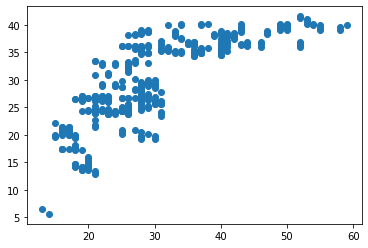

In [75]:
#plt.scatter(x=y1_train,y=y1_fit)
#plt.xlabel='data'
#plt.ylabel='fit'

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comb08', ylabel='Density'>

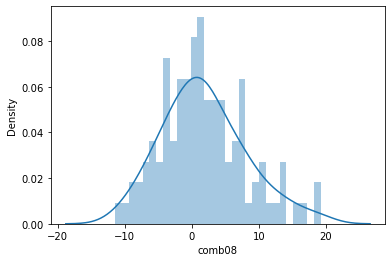

In [82]:
#sns.distplot(y1_test-y1_predict,bins=30)

In [83]:
#print('MSE of fitting: ',(1./len(y1_test))*(sum((y1_test-y1_predict)**2)))

MSE of fitting:  42.111235027277104


In [106]:
# Now to to include dummies
m2 = LinearRegression()
X2 = dat_spec1_gasOnly.drop(['comb08','city08','highway08'],axis=1)
y2 = dat_spec1_gasOnly['comb08']
m2.fit(X2,y2)

LinearRegression()

In [107]:
m2.intercept_

-1131.2821279089208

In [108]:
m2.coef_

array([ 0.59314318, -0.86942111, -2.20071746, -2.5708121 ,  6.52499636,
       -4.35955923,  3.09414967, -0.68949758, -5.55827042, -4.11935957,
       -4.29323912,  4.83537712, -2.29606795, -4.10070094, -3.8601575 ,
       -1.65464171, -0.95698297])

In [112]:
# Now splitting
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [113]:
m2.fit(X2_train,y2_train)

LinearRegression()

In [115]:
# 1. Check for goodness of fit
y2_fit=m2.predict(X2_train)
print("R squared {}".format(r2_score(y_true=y2_train, y_pred=y2_fit)))
# 2. Residuals have ~zero mean
residuals = y2_train-y2_fit
print("Mean of Residuals {}".format(np.mean(residuals)))



R squared 0.7443744447441158
Mean of Residuals -5.300085674667414e-16


/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KstestResult(statistic=0.32217255987773674, pvalue=4.017816299008115e-40)

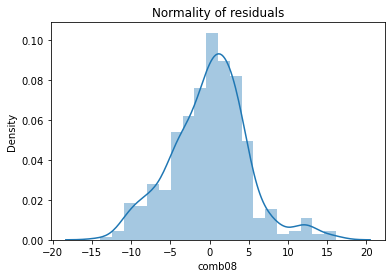

In [116]:
# 3. Normality of residuals - Kolmogorov Smirnov
sns.distplot(residuals, kde=True)
plt.title("Normality of residuals")
kstest(residuals,'norm')

In [117]:
# 4. Check for autocorrelation of residuals
diag.acorr_ljungbox(residuals , lags = 10, boxpierce=True)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 0.42925199,  0.71739199,  1.08336719,  6.8727324 ,  7.47218971,
         9.61424663, 11.39321547, 11.66261562, 12.50793409, 13.18877526]),
 array([0.51235622, 0.69858669, 0.78109075, 0.14276854, 0.18782371,
        0.14186528, 0.1223631 , 0.16690379, 0.18616448, 0.2133079 ]),
 array([ 0.42626415,  0.71173   ,  1.07345955,  6.78223035,  7.3719517 ,
         9.47424886, 11.21606986, 11.47921942, 12.30296364, 12.96484868]),
 array([0.51382779, 0.70056719, 0.7834846 , 0.14785371, 0.19441451,
        0.14861056, 0.12946791, 0.17599562, 0.19676349, 0.22564381]))

In [119]:
# 5. Multicolinearity based on VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X2_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2_train.values, i)
                          for i in range(len(X2_train.columns))]
  
print(vif_data)

                                  feature         VIF
0                                    year   58.352700
1                                   displ  130.631470
2                               num_gears   47.360624
3                               cylinders  179.865957
4                      tran_A_or_M_Manual    1.935982
5                                  WD_4WD    3.476328
6                       VClass_large cars    1.562347
7                     VClass_midsize cars    4.184435
8           VClass_midsize station wagons    1.145162
9                          VClass_minivan    1.035193
10     VClass_small sport utility vehicle    2.515747
11            VClass_small station wagons    1.475213
12           VClass_sport utility vehicle    1.381404
13          VClass_standard pickup trucks    3.176704
14  VClass_standard sport utility vehicle    2.763963
15                 VClass_subcompact cars    1.344904
16                     VClass_two seaters    1.817348


In [101]:
# What if high VIF (>5) variables are dropped
m3 = LinearRegression()
X3 = dat_spec1_gasOnly.drop(['comb08','city08','highway08','year','displ','num_gears', 'cylinders'],axis=1)
y3 = dat_spec1_gasOnly['comb08']
m3.fit(X3,y3)
# Now splitting
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.4, random_state=0)

In [120]:
m3.fit(X3_train,y3_train)

LinearRegression()

In [121]:
# 1. Check for goodness of fit
y3_fit=m3.predict(X3_train)
print("R squared {}".format(r2_score(y_true=y3_train, y_pred=y3_fit)))
# 2. Residuals have ~zero mean
residuals = y3_train-y3_fit
print("Mean of Residuals {}".format(np.mean(residuals)))



R squared 0.516249613794405
Mean of Residuals 2.394220087887294e-15


/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KstestResult(statistic=0.4506718469263904, pvalue=3.2507919654870793e-60)

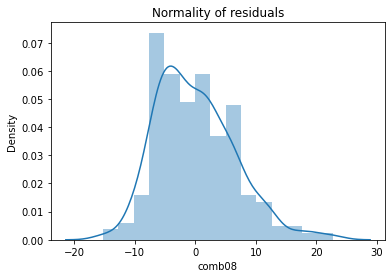

In [122]:
# 3. Normality of residuals - Kolmogorov Smirnov
sns.distplot(residuals, kde=True)
plt.title("Normality of residuals")
kstest(residuals,'norm')

In [123]:
# 4. Check for autocorrelation of residuals
diag.acorr_ljungbox(residuals , lags = 10, boxpierce=True)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 0.9340968 ,  0.93410059,  1.46946629,  1.7367045 ,  2.47085624,
         2.59358732,  9.14418588,  9.29594683, 10.1364596 , 11.03253461]),
 array([0.33380063, 0.62684856, 0.68933521, 0.78403991, 0.78087764,
        0.85785024, 0.24246925, 0.3179487 , 0.33955147, 0.35498888]),
 array([ 0.92544775,  0.9254515 ,  1.45255539,  1.71484474,  2.43313517,
         2.55283586,  8.92147334,  9.06855032,  9.88052716, 10.7434142 ]),
 array([0.33604862, 0.62956527, 0.693263  , 0.78801932, 0.78652964,
        0.86250826, 0.25834324, 0.3365462 , 0.36024361, 0.37785476]))

In [124]:
# 5. Multicolinearity based on VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X3_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X3_train.values, i)
                          for i in range(len(X3_train.columns))]
  
print(vif_data)

                                  feature       VIF
0                      tran_A_or_M_Manual  3.033172
1                                  WD_4WD  2.670319
2                       VClass_large cars  1.015610
3                     VClass_midsize cars  1.115588
4           VClass_midsize station wagons  1.069108
5                          VClass_minivan  1.000000
6      VClass_small sport utility vehicle  1.491621
7             VClass_small station wagons  1.000000
8            VClass_sport utility vehicle  1.008293
9           VClass_standard pickup trucks  1.136967
10  VClass_standard sport utility vehicle  1.756838
11                 VClass_subcompact cars  1.059709
12                     VClass_two seaters  3.049758


#### This model with dummies carrying info about transmission type, WD, vehicles type performs better tha the model without dummies!